In [1]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [22]:
# Task 1: Utilize Libraries/Dataset
def load_and_explore_data(file_path):
    """
    Load the dataset and perform basic exploration

    Parameters:
    file_path (str): Path to the customer data CSV file

    Returns:
    pandas.DataFrame: The loaded customer data
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display the first few rows
    print("First 5 rows of the dataset:")
    print(df.head())

    # Display dataset info
    print("\nDataset Information:")
    print(df.info())

    # Display basic statistics
    print("\nBasic Statistics:")
    print(df.describe())

    return df
df = load_and_explore_data('sample_data/enhanced_diabetes_dataset.csv')

First 5 rows of the dataset:
   Age  Gender  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0   52       1            1      124           95.0           20.0        0   
1   43       1            2      144           86.0           23.0        3   
2   55       1            4      141          113.0           18.0      297   
3   68       1            3      125          110.0           32.0      210   
4   41       0            0      177           92.0           14.0      189   

    BMI  DiabetesPedigreeFunction  HbA1c  FastingBS  Triglycerides   HDL  \
0  36.0                     0.078    4.7         87          142.0  37.0   
1  32.9                     0.118    6.3        135          162.0  89.0   
2  43.4                     0.139    5.4        113          180.0  45.0   
3  22.7                     0.197    5.2         93          262.0  56.0   
4  38.1                     0.078   10.5        126          332.0  66.0   

   Smoking  PhysicalActivity  Prediabet

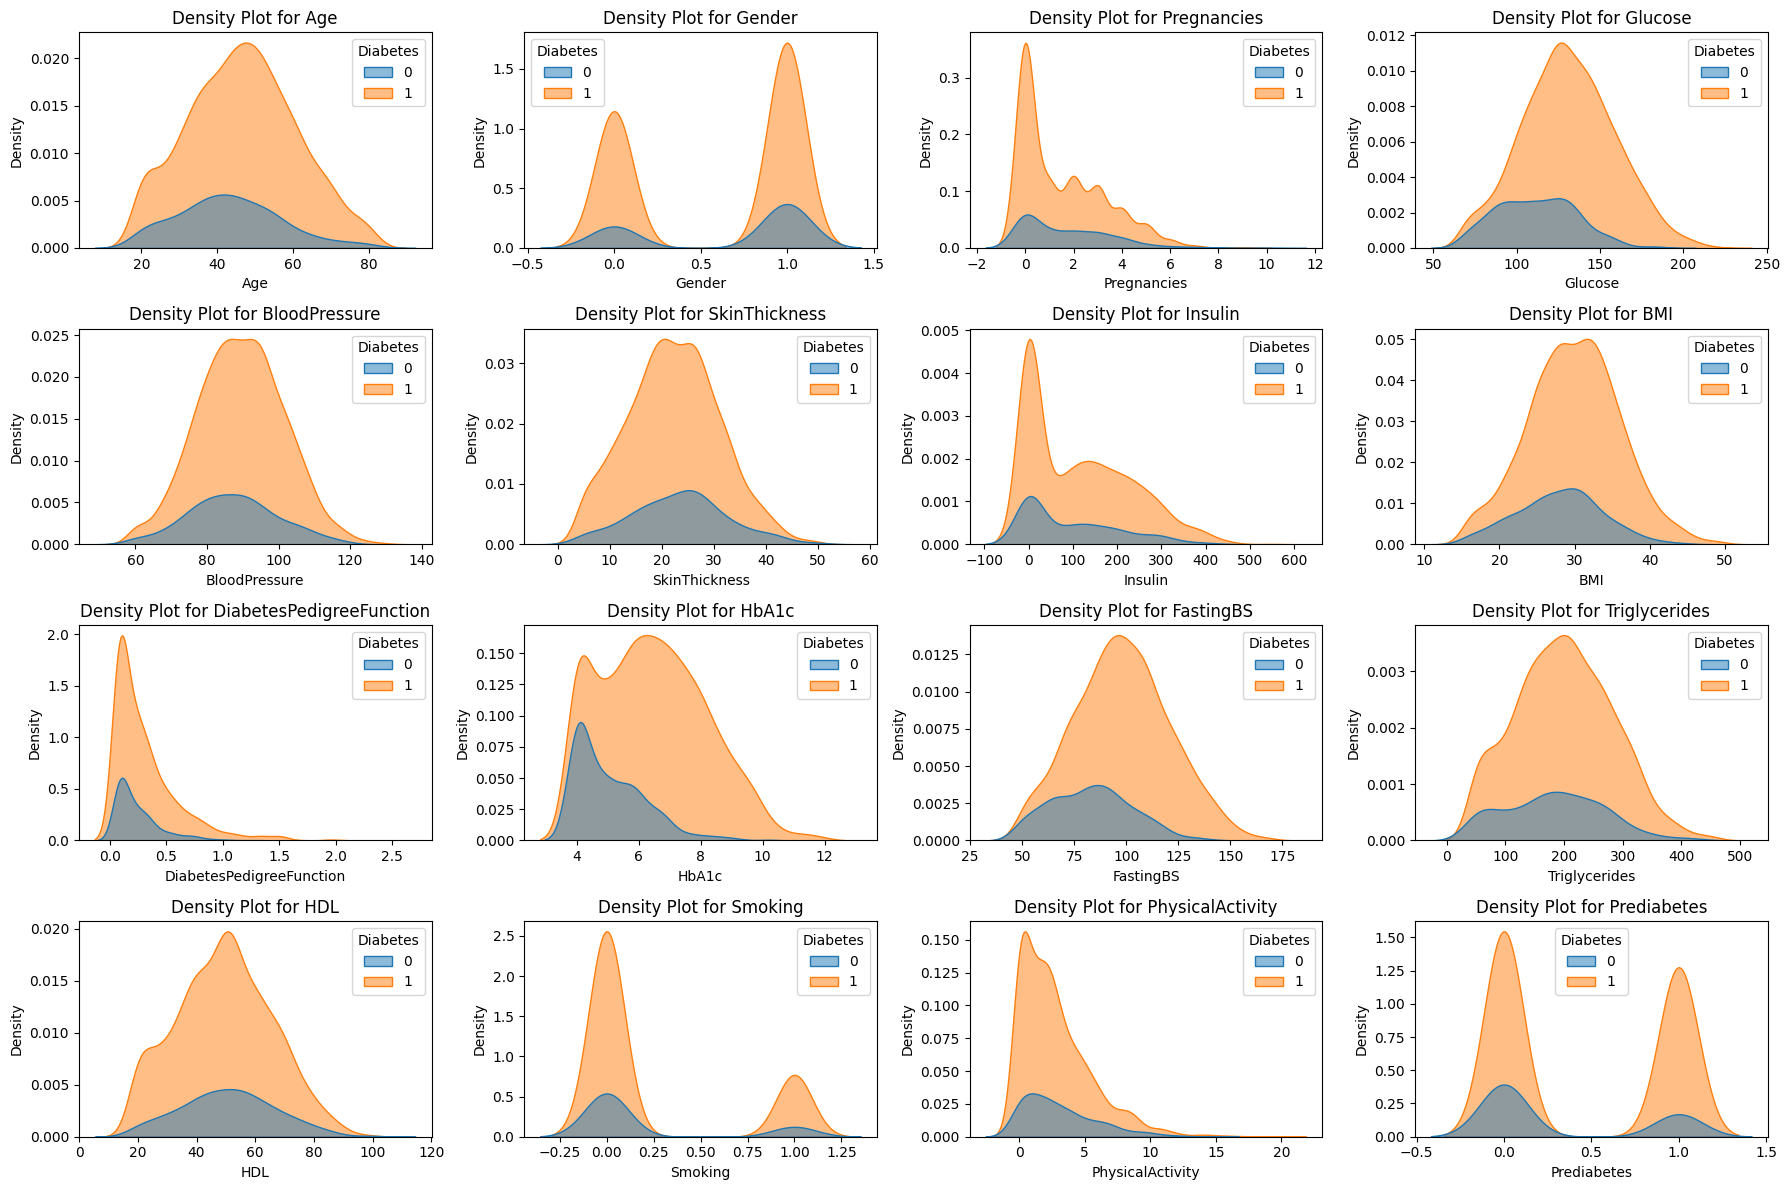

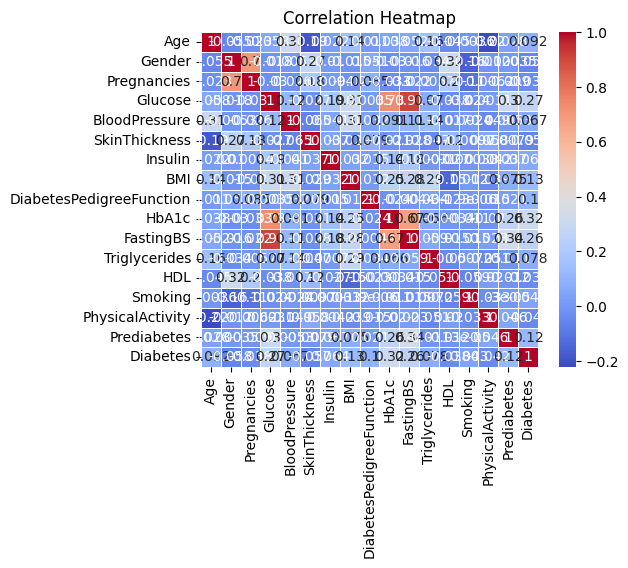

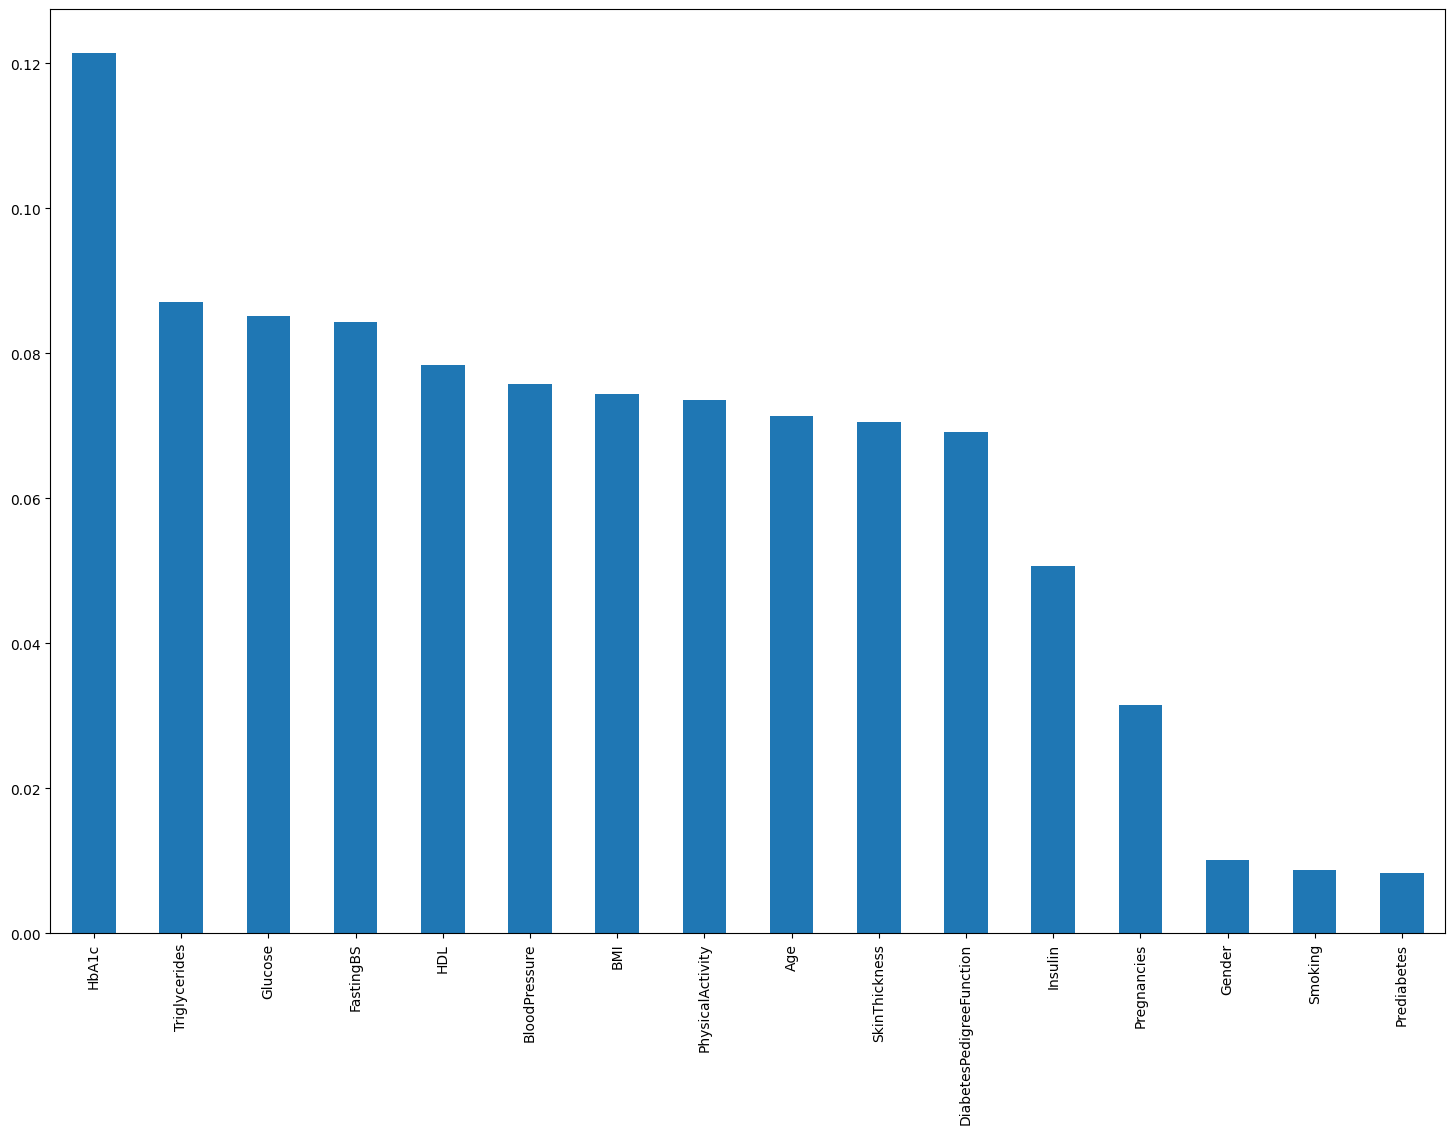

In [23]:
# Task 2: Data Visualization - EDA
def perform_eda(df):
    """
    Perform Exploratory Data Analysis on the Patient dataset

    Parameters:
    df (pandas.DataFrame): Patient dataset
    """

    # 1. Create distribution plots comparing features between diabetic and non-diabetic patients
    plt.figure(figsize=(18, 12))
    for i, column in enumerate(df.columns[:16]):  # Skip Label column
      plt.subplot(4, 4, i+1)
      sns.kdeplot(data=df, x= column, hue='Diabetes', fill=True, alpha=0.5)
      plt.title(f'Density Plot for {column}')
      plt.xlabel(f'{column}')
      plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    # 2. Correlation heatmap
    plt.figure(figsize=(25, 20))
    plt.subplot(4, 4, 4)
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')

    # 3. Visualise feature importance using appropriate techniques
    # Create a figure for distribution plots
    plt.figure(figsize=(18, 12))
    model = RandomForestClassifier()
    X = df.iloc[:, :-1]
    y = df['Diabetes']

    model.fit(X, y)

    (pd.Series(model.feature_importances_, index=X.columns)
      .nlargest(16)
      .plot(kind='bar'))


perform_eda(df)

Missing values in each column:
Age                         0
Gender                      0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
HbA1c                       0
FastingBS                   0
Triglycerides               0
HDL                         0
Smoking                     0
PhysicalActivity            0
Prediabetes                 0
Diabetes                    0
dtype: int64

Age - Lower Bound: 7.5, Upper Bound: 83.5
Age - Outliers detected:
Empty DataFrame
Columns: [Age, Gender, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, HbA1c, FastingBS, Triglycerides, HDL, Smoking, PhysicalActivity, Prediabetes, Diabetes]
Index: []

Gender - Lower Bound: -1.5, Upper Bound: 2.5
Gender - Outliers detected:
Empty DataFrame
Columns: [Age, Gender, Pregnancies, Glucose, BloodPressure,

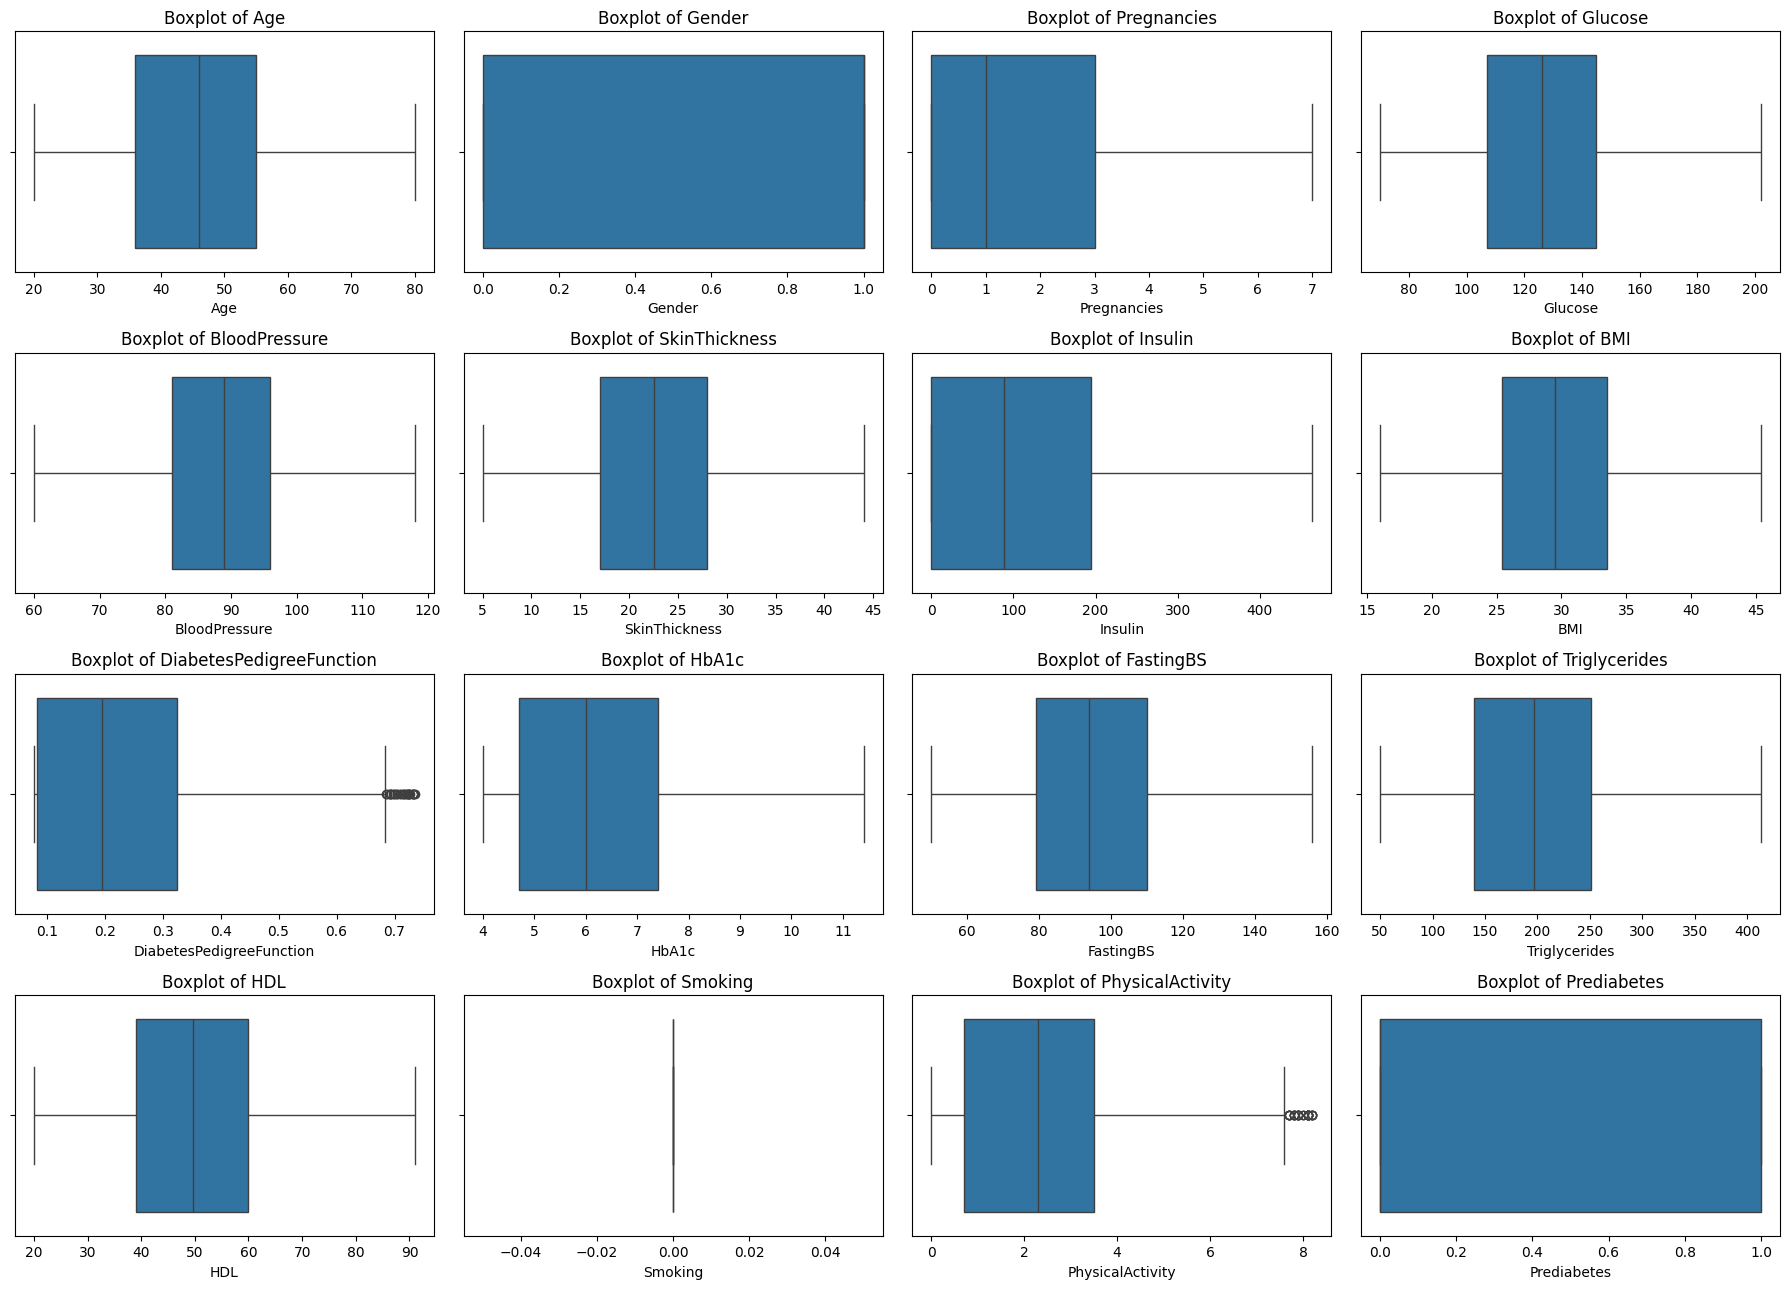

In [25]:
# Task 3: Check for missing values and handle outliers
from scipy import stats

def check_data_quality(df):
    """
    Check for missing values and outliers in the dataset

    Parameters:
    df (pandas.DataFrame): Customer dataset

    Returns:
    pandas.DataFrame: DataFrame with outliers handled (if any)
    """
    # Check for missing values
    print("Missing values in each column:")
    print(df.isnull().sum())
    # Fill null values with mean
    df = df.fillna(df.mean(numeric_only=True))

    # Visualize outliers using boxplots
    # plt.figure(figsize=(18, 13))
    # for i, column in enumerate(df.columns[:-1]):  # Skip Label column
    #     plt.subplot(4, 4, i+1)
    #     sns.boxplot(x=df[column])
    #     plt.title(f'Boxplot of {column}')

    # plt.tight_layout()
    # plt.show()

    # Handle outliers
    df = findAndHandleOutliers(df)

    plt.figure(figsize=(18, 13))
    for i, column in enumerate(df.columns[:-1]):  # Skip Label column
        plt.subplot(4, 4, i+1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()
    return df

def findAndHandleOutliers(df):
  for i, column in enumerate(df.columns[:-1]):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds (1.5 * IQR is a common threshold)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{column} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Create a boolean mask for outliers
    # Values outside the bounds will be True (outlier)
    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"{column} - Outliers detected:\n{df[outliers_mask]}")
    # Calculate the median of non-outlier values
    median_value = df[~outliers_mask][column].median()

    # Impute the outliers with the calculated median value
    df.loc[outliers_mask, column] = median_value
  print(df)
  return df

df = check_data_quality(df)


In [26]:
# Task 4: Prepare Features and Target Variable
#The recommended, standard workflow is: Split -> Normalize -> SMOTE. Normalization and upsampling should happen only on training data so the test data does not influence training

X = df.drop(columns = ['Diabetes'])
y = df['Diabetes']

#Split data into training (70%), validation (15%), and test (15%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
# 0.15 (desired validation size) / 0.85 (remaining data size) = ~0.17647
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.17, random_state=0)

#Normalize
scaler_X = MinMaxScaler()
Xt = scaler_X.fit_transform(X_train)
Xv = scaler_X.transform(X_val)
Xtr = scaler_X.transform(X_test)

print(Xt.shape, y_train.shape)
print(Xt)
print(y_train)


(1411, 16) (1411,)
[[0.26666667 0.         0.         ... 0.         0.1097561  0.        ]
 [0.25       0.         0.         ... 0.         0.67073171 0.        ]
 [0.8        1.         0.57142857 ... 0.         0.         0.        ]
 ...
 [0.33333333 0.         0.         ... 0.         0.59756098 0.        ]
 [0.5        1.         0.28571429 ... 0.         0.40243902 1.        ]
 [0.75       1.         0.         ... 0.         0.01219512 1.        ]]
401     0
1156    1
1078    1
1098    1
992     1
       ..
1481    1
947     1
910     1
1700    1
1410    1
Name: Diabetes, Length: 1411, dtype: int64


In [27]:
#Task 5: Class Imbalance

from imblearn.over_sampling import SMOTE
from collections import Counter

class_inf = Counter(y_train)
print(class_inf)
print(Xt.shape)
#Upsampling to balance no of normal vs diabetic samples
sm = SMOTE()
Xts,yts = sm.fit_resample(Xt, y_train)

class_inf = Counter(yts)
print(class_inf)
print(Xts.shape)



Counter({1: 1140, 0: 271})
(1411, 16)
Counter({0: 1140, 1: 1140})
(2280, 16)


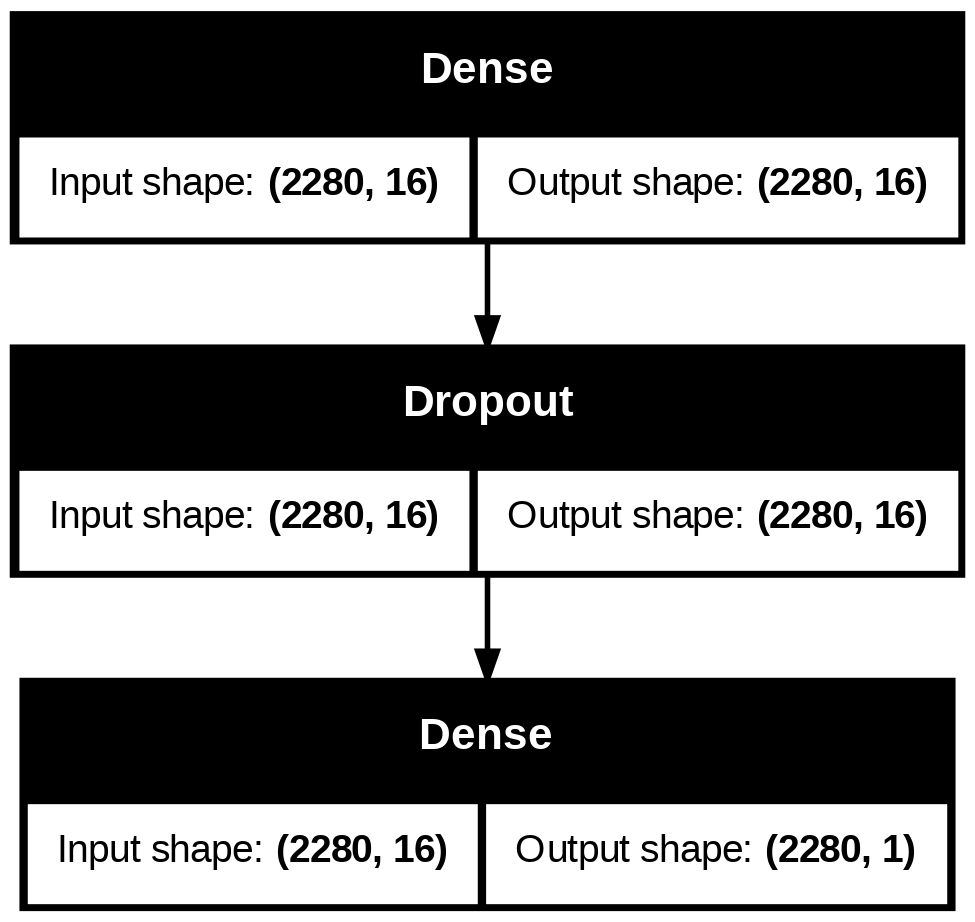

In [33]:
#Task 6: Design an Appropriate DCNN-based Architecture and Task 7: Configure
from keras.optimizers import Adam
def baseline_model():
    # create model
    model = Sequential()
    #Not adding any convolutional layers as the input is not spatial data.
    #Not adding pooling as there is no need for dimensionality reduction
    #flatten layer is not required as input is acceptable vector
    model.add(Dense(16,  activation='relu'))
    model.add( Dropout(0.2) )
    model.add(Dense(1, activation = "sigmoid"))
    # Compile model
    # Instantiate an optimizer with a specific learning rate
    learning_rate = 0.01
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model
model = baseline_model()
model.build(input_shape= Xts.shape)
keras.utils.plot_model(model, show_shapes=True)

In [34]:
#Task 8: Train the model with Appropriate Batch Size and Number of Epochs
history = model.fit(Xts, yts, epochs=500, validation_data=(Xv, y_val), batch_size=10)



Epoch 1/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6114 - loss: 0.6677 - val_accuracy: 0.7612 - val_loss: 0.5023
Epoch 2/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6821 - loss: 0.5961 - val_accuracy: 0.7059 - val_loss: 0.5476
Epoch 3/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7031 - loss: 0.5673 - val_accuracy: 0.7024 - val_loss: 0.5444
Epoch 4/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7079 - loss: 0.5655 - val_accuracy: 0.6505 - val_loss: 0.5846
Epoch 5/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6965 - loss: 0.5647 - val_accuracy: 0.6782 - val_loss: 0.5646
Epoch 6/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7036 - loss: 0.5618 - val_accuracy: 0.7232 - val_loss: 0.5133
Epoch 7/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7153 - loss: 0.5489 - val_accuracy: 0.6886 - val_loss: 0.5551
Epoch 8/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7182 - loss: 0.5676 - val_accu

In [ ]:
#Task 9: Implement Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# Monitor 'val_loss' and stop training if it doesn't improve for 5 epochs
# Restore the best weights found during training
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

cp_callback = ModelCheckpoint(
    filepath='best_model_checkpoint.h5',
    monitor='val_loss',          # Quantity to monitor (e.g., 'val_accuracy', 'val_loss')
    save_best_only=True,         # Only save a new model if the monitored quantity improves
    mode='min',                  # The monitored quantity should be minimized (use 'max' for accuracy)
    verbose=1                    # Log a message each time a checkpoint is saved
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # Metric to monitor
    factor=0.001,         # Factor to reduce LR by (new_lr = lr * factor)
    patience=5,         # Number of epochs with no improvement
    min_lr=0.00001,      # Lower bound on learning rate
    verbose=1
)

In [ ]:
model.fit(Xts, yts, epochs=500, validation_data=(Xv, y_val), batch_size=10,
          callbacks=[early_stopping_callback,cp_callback, reduce_lr])

Epoch 1/500
111/114 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6945 - loss: 0.5664
Epoch 1: val_loss did not improve from 0.51334
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6942 - loss: 0.5664 - val_accuracy: 0.7197 - val_loss: 0.5140 - learning_rate: 1.0000e-05
Epoch 2/500
107/114 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6739 - loss: 0.5717
Epoch 2: val_loss did not improve from 0.51334
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6740 - loss: 0.5717 - val_accuracy: 0.7197 - val_loss: 0.5145 - learning_rate: 1.0000e-05
Epoch 3/500
 98/114 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6754 - loss: 0.5673
Epoch 3: val_loss did not improve from 0.51334
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6740 - loss: 0.5687 - val_accuracy: 0.7197 - val_loss: 0.5153 - learning_rate: 1.0000e-05
Epoch 4/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6761 - loss: 0.5754
Epoch 4: val_loss did not improve from 0.51334
114/114 ━━━━━━━━━━━━━━━━━━━━ 

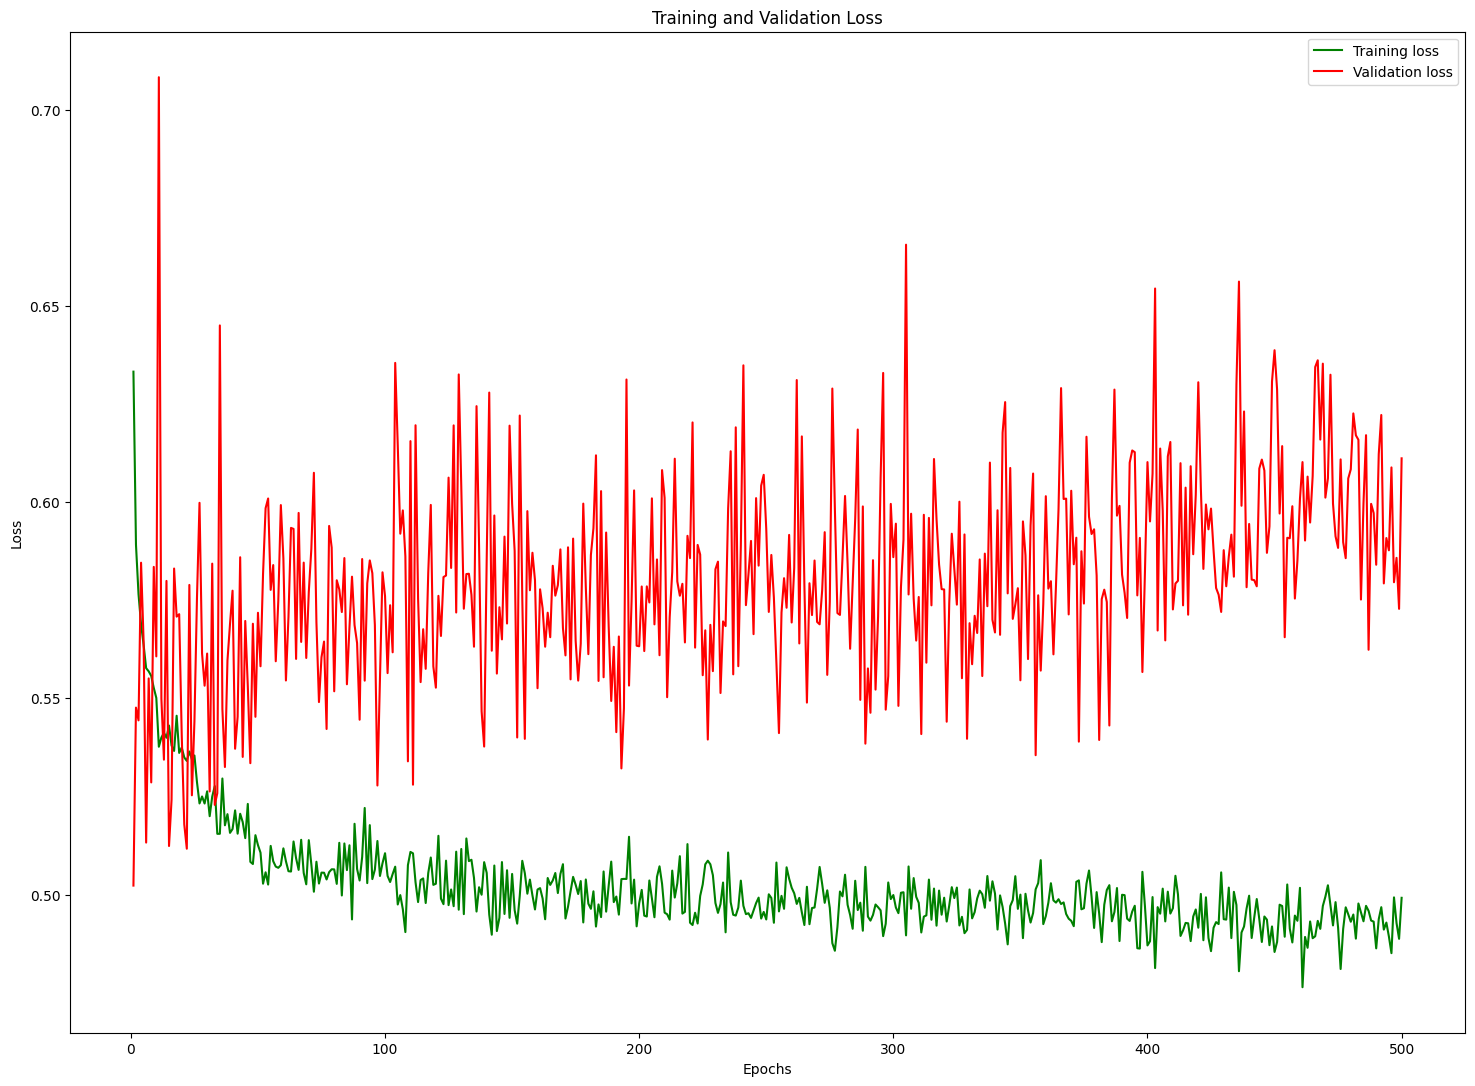

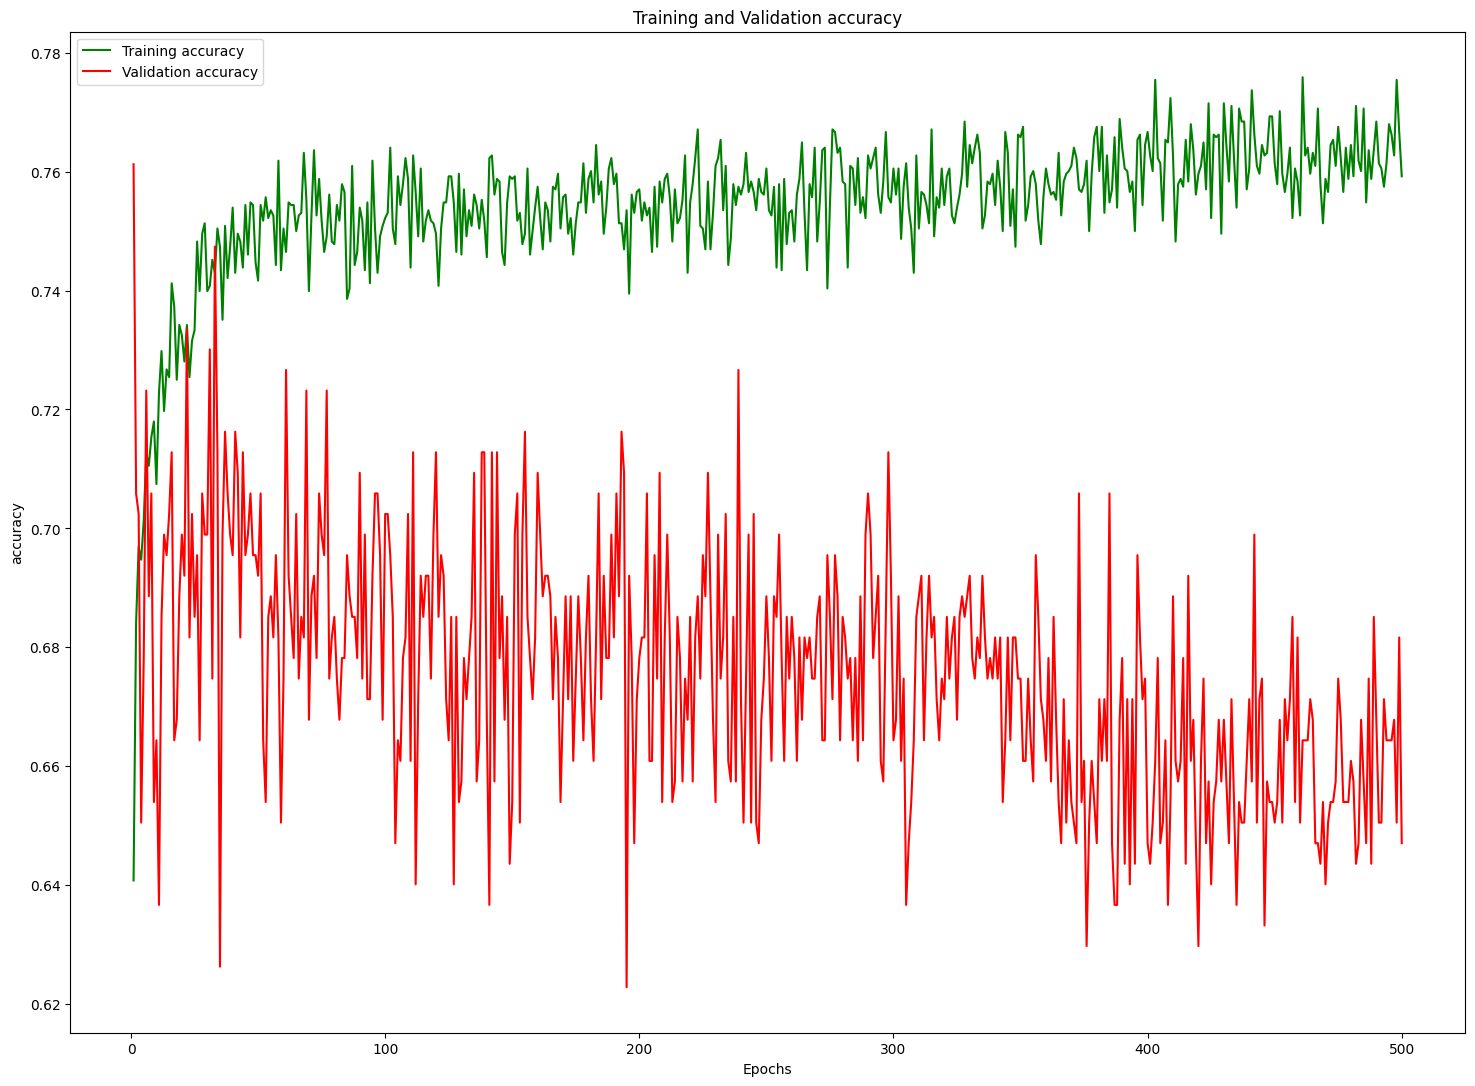

In [36]:
#Task 10: Visualise the Training Process:

#plot training and validation loss
# Get the loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(18, 13))
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plot training and validation accuray
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(18, 13))
plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()